COVID-19

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas.tseries
import pandasql
from pandasql import sqldf
%matplotlib inline

pysqldf = lambda q: sqldf(q, globals())

In [8]:
df = pd.read_csv('COVID_19 Cases.csv')

In [10]:
df.head()

,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Prep_Flow_Runtime,Latest_Date,Lat,Long
0,3/11/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
1,3/11/2020,US,Arizona,Deaths,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
2,3/11/2020,US,Arizona,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
3,3/11/2020,US,Arizona,Active,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
4,2/15/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.8162,-111.2845


In [21]:
df.isna().any().any()

True

In [24]:
for col in df.columns:
    if df[col].isna().any() == True:
        print(f'The {col} column contains missing values.')

The Province_State column contains missing values.


In [25]:
df.Province_State.unique()

array(['Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'Wisconsin',
       'Manitoba', 'Maine', 'Gansu', 'Ningxia', 'French Polynesia',
       'Sichuan', 'Heilongjiang', 'Australian Capital Territory',
       'Sint Maarten', 'Fujian', 'Isle of Man', 'Idaho', 'Mississippi',
       'Denmark', 'Hong Kong', 'Queensland', 'New Brunswick', 'Hebei',
       'Xinjiang', 'Yunnan', 'Western Australia', 'St Martin', 'Curacao',
       'Tianjin', 'Quebec', 'Netherlands', 'France', 'Grand Princess',
       'Alabama', 'Be

array(['3/11/2020', '2/15/2020', '1/30/2020', '3/17/2020', '3/3/2020',
       '2/4/2020', '2/25/2020', '1/28/2020', '3/1/2020', '1/29/2020',
       '3/10/2020', '2/16/2020', '3/4/2020', '2/2/2020', '3/20/2020',
       '1/25/2020', '2/18/2020', '2/21/2020', '3/12/2020', '3/6/2020',
       '3/14/2020', '3/21/2020', '1/24/2020', '2/22/2020', '3/8/2020',
       '3/22/2020', '2/3/2020', '3/13/2020', '2/13/2020', '3/5/2020',
       '2/19/2020', '3/7/2020', '2/1/2020', '2/23/2020', '2/7/2020',
       '2/17/2020', '2/24/2020', '1/26/2020', '2/5/2020', '2/14/2020',
       '3/15/2020', '2/28/2020', '2/10/2020', '3/2/2020', '1/31/2020',
       '2/8/2020', '3/18/2020', '3/9/2020', '3/19/2020', '2/9/2020',
       '2/27/2020', '2/29/2020', '1/23/2020', '2/20/2020', '2/12/2020',
       '2/11/2020', '1/27/2020', '2/6/2020', '3/16/2020', '2/26/2020'],
      dtype=object)

In [31]:
# Convert Data column to datetime
df.Date = pd.to_datetime(df.Date, format='%m/%d/%y', errors='ignore')

In [33]:
# Setting Date as dataframe index:
df.set_index('Date', inplace = True)

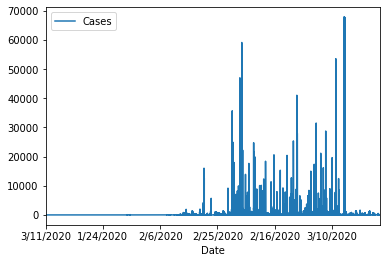

In [40]:
fig = plt.figure(figsize=(12,12))
ax = df.Cases.plot()


plt.legend()
plt.show()

In [50]:
df_Arizona = df[df.Province_State == 'Arizona']
df_Arizona

,Country_Region,Province_State,Case_Type,Cases,Difference,Prep_Flow_Runtime,Latest_Date,Lat,Long
Date,,,,,,,,,
3/11/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
3/11/2020,US,Arizona,Deaths,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
3/11/2020,US,Arizona,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
3/11/2020,US,Arizona,Active,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
2/15/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.8162,-111.2845
...,...,...,...,...,...,...,...,...,...
2/9/2020,US,Arizona,Active,0,0,3/23/2020 8:00:09 AM,3/22/2020,33.7298,-111.4312
2/27/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,33.7298,-111.4312
2/27/2020,US,Arizona,Deaths,0,0,3/23/2020 8:00:09 AM,3/22/2020,33.7298,-111.4312


In [ ]:
df_region_preview = pd.read_sql_query("""SELECT o.ShipRegion, \
            SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) TotalRev \
            FROM [OrderDetail] od \
            INNER JOIN [Order] o on o.Id = od.OrderId \
            GROUP BY o.ShipRegion \
            ORDER BY TotalRev DESC""", engine)
df_region_preview.head(10)